In [ ]:
#Transferencia de Aprendizaje / Transfer Learning
#Crear nuestro propio conjunto de datos

In [ ]:
!unzip capacitorespreparados/capacitorespreparados.zip -d capacitorespreparados

Archive:  capacitorespreparados/capacitorespreparados.zip
   creating: capacitorespreparados/capacitorespreparados/
  inflating: capacitorespreparados/capacitorespreparados/capacitores10.jpeg  
  inflating: capacitorespreparados/capacitorespreparados/capacitores100.jpg  
  inflating: capacitorespreparados/capacitorespreparados/capacitores101.jpg  
  inflating: capacitorespreparados/capacitorespreparados/capacitores102.jpg  
  inflating: capacitorespreparados/capacitorespreparados/capacitores103.jpg  
  inflating: capacitorespreparados/capacitorespreparados/capacitores104.jpg  
  inflating: capacitorespreparados/capacitorespreparados/capacitores105.jpg  
  inflating: capacitorespreparados/capacitorespreparados/capacitores106.jpg  
  inflating: capacitorespreparados/capacitorespreparados/capacitores107.jpg  
  inflating: capacitorespreparados/capacitorespreparados/capacitores108.jpg  
  inflating: capacitorespreparados/capacitorespreparados/capacitores109.jpg  
  inflating: capacitorespr

In [ ]:
!unzip resistenciaspreparadas/resistenciaspreparados.zip -d resistenciaspreparados

Archive:  resistenciaspreparadas/resistenciaspreparados.zip
   creating: resistenciaspreparados/resistenciaspreparados/
  inflating: resistenciaspreparados/resistenciaspreparados/resistencias10.jpeg  
  inflating: resistenciaspreparados/resistenciaspreparados/resistencias100.jpg  
  inflating: resistenciaspreparados/resistenciaspreparados/resistencias101.jpg  
  inflating: resistenciaspreparados/resistenciaspreparados/resistencias102.jpg  
  inflating: resistenciaspreparados/resistenciaspreparados/resistencias103.jpg  
  inflating: resistenciaspreparados/resistenciaspreparados/resistencias104.jpg  
  inflating: resistenciaspreparados/resistenciaspreparados/resistencias105.jpg  
  inflating: resistenciaspreparados/resistenciaspreparados/resistencias106.jpg  
  inflating: resistenciaspreparados/resistenciaspreparados/resistencias107.jpg  
  inflating: resistenciaspreparados/resistenciaspreparados/resistencias108.jpg  
  inflating: resistenciaspreparados/resistenciaspreparados/resistencia

In [ ]:
!unzip transistorespreparados/transistorespreparados.zip -d transistorespreparados

Archive:  transistorespreparados/transistorespreparados.zip
   creating: transistorespreparados/transistorespreparados/
  inflating: transistorespreparados/transistorespreparados/transistores10.jpeg  
  inflating: transistorespreparados/transistorespreparados/transistores100.jpg  
  inflating: transistorespreparados/transistorespreparados/transistores101.jpg  
  inflating: transistorespreparados/transistorespreparados/transistores102.jpg  
  inflating: transistorespreparados/transistorespreparados/transistores103.jpg  
  inflating: transistorespreparados/transistorespreparados/transistores104.jpg  
  inflating: transistorespreparados/transistorespreparados/transistores105.jpg  
  inflating: transistorespreparados/transistorespreparados/transistores106.jpg  
  inflating: transistorespreparados/transistorespreparados/transistores107.jpg  
  inflating: transistorespreparados/transistorespreparados/transistores108.jpg  
  inflating: transistorespreparados/transistorespreparados/transistore

In [ ]:
#borrar los archivos .zip
!rm -rf resistenciaspreparadas/resistenciaspreparados.zip
!rm -rf transistorespreparados/resistenciaspreparados.zip
!rm -rf capacitorespreparados/capacitorespreparados.zip

In [ ]:
import os

if not os.path.exists('dataset'):
    os.makedirs('dataset')
os.system('cp -r resistenciaspreparados dataset/resistenciaspreparados')
os.system('cp -r transistorespreparados dataset/transistorespreparados')
os.system('cp -r capacitorespreparados dataset/capacitorespreparados')

0

In [ ]:
import shutil
import os

if os.path.exists('dataset'):
    shutil.rmtree('dataset')
os.makedirs('dataset')
os.system('cp -r resistenciaspreparados dataset/resistenciaspreparados')
os.system('cp -r transistorespreparados dataset/transistorespreparados')
os.system('cp -r capacitorespreparados dataset/capacitorespreparados')


0

In [ ]:
#Crear un set de datos (ya no en memoria)

!mkdir dataset
!cp -r resistenciaspreparados dataset/resistenciaspreparados
!cp -r transistorespreparados dataset/transistorespreparados
!cp -r capacitorespreparados dataset/capacitorespreparados

mkdir: cannot create directory ‘dataset’: File exists


In [ ]:
!ls /content/capacitorespreparados/capacitorespreparados | wc -l # cantidad de archivos
!ls /content/transistorespreparados/transistorespreparados | wc -l # cantidad de archivos
!ls /content/resistenciaspreparados/resistenciaspreparados | wc -l # cantidad de archivos

207
197
197


In [ ]:
#Aumento de datos
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(   #darselo al modelo mientras
    rescale=1. / 255,  #normalizar
    rotation_range = 10,  #rota un poco las imagenes
    width_shift_range=0.15,  #mueve las imagens en el ancho (izq o derecha)
    height_shift_range = 0.15, #mueve las imagens en el largo (arr o abajo)
    shear_range = 5, #zoom a las imagenes (un poco)
    zoom_range = [0.7, 1.3],  #minimo acercamiento y acercamiento maximo de 1.3
    validation_split = 0.2 #quiero que el 20% de las imagenes sean generadas
)


#Generadores para set de datos de entrenamiento y de pruebas
data_gen_entrenamiento = datagen.flow_from_directory("/content/dataset",
                                                     target_size=(224,224), #tamaño de las imagenes
                                                     batch_size=32, shuffle=True,
                                                     subset="training")

data_gen_pruebas = datagen.flow_from_directory("/content/dataset",
                                                     target_size=(224,224),
                                                     batch_size=32, shuffle=True, #mezcle las imagenes constantemente
                                                     subset="validation") #este termina con el 80%



Found 482 images belonging to 3 classes.
Found 119 images belonging to 3 classes.


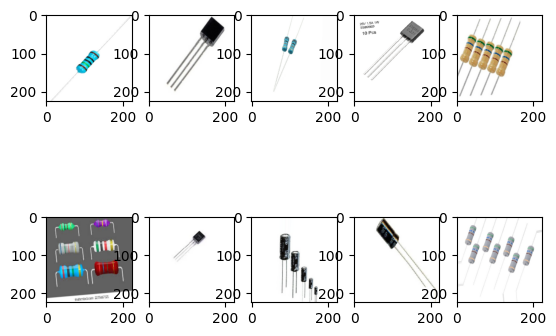

In [ ]:
import matplotlib.pyplot as plt

#ver como quedaron las imagenes
for imagenes, etiquetas in data_gen_entrenamiento: #data_gen_entrenamiento es un generador
  for i in range(10):  #conjunto de 10 imagenes
    plt.subplot(2, 5, i+1) #solo vere 2x5 imagenes
    plt.imshow(imagenes[i])
  break #solo van a entrar una vez las imagenes, ya tratadas
plt.show()

In [ ]:
#Redes convolucionales
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
#descargamos modelo entrenado por google
url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224, 224, 3)) #descargar el modelo

In [ ]:
#Importante
#Congelar las capas
mobilenetv2.trainable = False #no queremos que se entrene mas
#que los pesos y sesgos se queden como estan

In [ ]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(3, activation="softmax") #solo agregamos una capa mas (con 3 unidades (tenedores, cuchillos, cucharas))
])
#entrenar modelo

In [ ]:
modelo.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)  #compilar

In [ ]:
EPOCAS = 24
entrenamiento = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
) #entrenamiento

Epoch 1/24
16/16 [==============================] - 8s 507ms/step - loss: 0.0269 - accuracy: 0.9855 - val_loss: 0.0226 - val_accuracy: 0.9916
Epoch 2/24
16/16 [==============================] - 9s 556ms/step - loss: 0.0303 - accuracy: 0.9876 - val_loss: 0.0287 - val_accuracy: 0.9916
Epoch 3/24
16/16 [==============================] - 9s 546ms/step - loss: 0.0281 - accuracy: 0.9855 - val_loss: 0.0342 - val_accuracy: 0.9916
Epoch 4/24
16/16 [==============================] - 8s 519ms/step - loss: 0.0372 - accuracy: 0.9917 - val_loss: 0.0808 - val_accuracy: 0.9832
Epoch 5/24
16/16 [==============================] - 9s 584ms/step - loss: 0.0548 - accuracy: 0.9834 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoch 6/24
16/16 [==============================] - 9s 566ms/step - loss: 0.0275 - accuracy: 0.9896 - val_loss: 0.0307 - val_accuracy: 0.9916
Epoch 7/24
16/16 [==============================] - 9s 569ms/step - loss: 0.0236 - accuracy: 0.9917 - val_loss: 0.0287 - val_accuracy: 0.9916
Epoch 

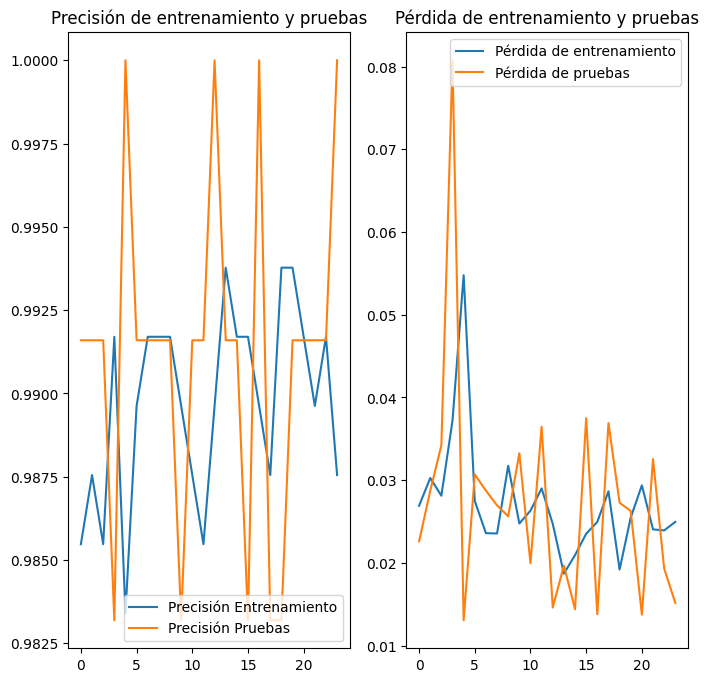

In [ ]:
#Graficas de precisión
acc = entrenamiento.history['accuracy']
val_acc = entrenamiento.history[ 'val_accuracy']

loss = entrenamiento.history['loss']
val_loss = entrenamiento.history['val_loss']

rango_epocas = range(len(acc))




plt.figure(figsize=(8,8))
plt.subplot (1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title( 'Precisión de entrenamiento y pruebas')

plt.subplot (1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend (loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show( )

In [ ]:
from PIL import Image
import cv2

def categorizar(ruta): #funcion para probar que el modelo lo hace bien
  img = Image.open(ruta)
  img = img.convert("RGB") #tomar la imagen como si tuviera 3 canales de color
  img = np.array(img).astype(float)/255 #normalizar a un arreglo numpy luego de volver numeros flotantes

  img = cv2.resize(img, (224, 224)) #la vuelve 224 x 224
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3)) #trasnformacion de la estructura del arreglo
  return np.argmax(prediccion[0], axis=-1) #solo devuelve el valor maximo para las dos clases

  #la neurona del animal al maximo y la del otro al 0 y viceversa
  #0 es babuino y 1 es jirafa

In [ ]:
ruta = "resistenciabella.jpeg"
prediccion = categorizar(ruta)
print(prediccion)

1/1 [==============================] - 0s 23ms/step
2


In [ ]:
ruta = "transistorbello.jpeg"
prediccion = categorizar(ruta)
print(prediccion)

1/1 [==============================] - 0s 22ms/step
0


In [ ]:
ruta = "capacitor.jpeg"
prediccion = categorizar(ruta)
print(prediccion)

1/1 [==============================] - 0s 22ms/step
1


In [ ]:
#IMAGEN A PROCESAR
